In [9]:
# Importando bibliotecas
import pandas as pd

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Importar a biblioteca para mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pydot
import pydotplus
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler # Undersampling

In [2]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/breast-cancer.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [3]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data['Class']
data.drop(["Class"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data, columns=['menopause', 'age', 'tumor-size', 'breast-quad', 'inv-nodes'])

In [4]:
# Substitui os valores nulos da coluna "node-caps" pelo valor mais frequente da coluna
data['node-caps'] = data['node-caps'].replace('?', data['node-caps'].mode()[0])

In [5]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
# node-caps: faltantes
treinamento_dados['breast'] = labelencoder.fit_transform(treinamento_dados['breast'])
treinamento_dados['irradiat'] = labelencoder.fit_transform(treinamento_dados['irradiat'])
treinamento_dados['node-caps'] = labelencoder.fit_transform(treinamento_dados['node-caps'])

In [6]:
# Separar dados de treinamento e de testes
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


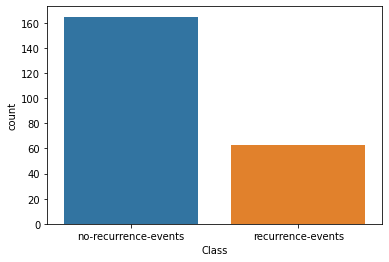

In [7]:
sns.countplot(dataset_treino_class)

In [ ]:
smote = RandomOverSampler()
# smote = RandomUnderSampler(random_state=0)
dataset_treino, dataset_treino_class = smote.fit_resample(dataset_treino, dataset_treino_class)
dataset_teste, dataset_teste_class = smote.fit_resample(dataset_teste, dataset_teste_class)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


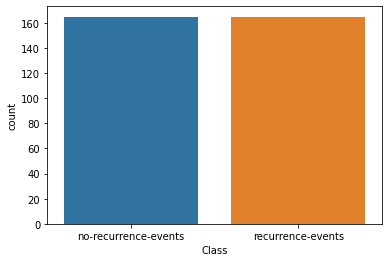

In [21]:
sns.countplot(dataset_treino_class)

In [12]:
tree_data = DecisionTreeClassifier(criterion="entropy")
tree_data.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

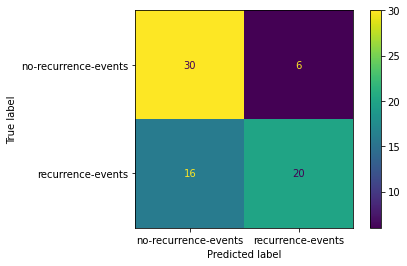

In [13]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [14]:
# Mostrar métricas
print('Árvore')
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_data.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_data.predict(dataset_teste)))
print('\n')

tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Árvore
Accuracy score =  0.6944444444444444


                      precision    recall  f1-score   support

no-recurrence-events       0.65      0.83      0.73        36
   recurrence-events       0.77      0.56      0.65        36

            accuracy                           0.69        72
           macro avg       0.71      0.69      0.69        72
        weighted avg       0.71      0.69      0.69        72



True negative rate: 0.8333333333333334
False positive rate: 0.16666666666666666
False negative rate: 0.4444444444444444
True positive rate: 0.5555555555555556


In [ ]:
gnb = GaussianNB()
gnb.fit(dataset_treino, dataset_treino_class)

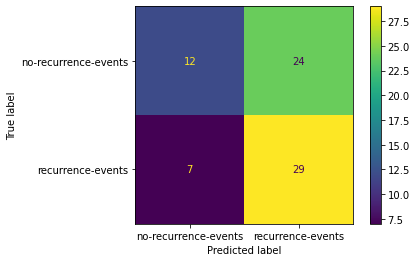

In [16]:
conf_matrix = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [17]:
# Mostrar métricas
print('Naive Bayes')
print("Accuracy score = ", accuracy_score(dataset_teste_class, gnb.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, gnb.predict(dataset_teste)))
print('\n')

tn, fp, fn, tp = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Naive Bayes
Accuracy score =  0.5694444444444444


                      precision    recall  f1-score   support

no-recurrence-events       0.63      0.33      0.44        36
   recurrence-events       0.55      0.81      0.65        36

            accuracy                           0.57        72
           macro avg       0.59      0.57      0.54        72
        weighted avg       0.59      0.57      0.54        72



True negative rate: 0.3333333333333333
False positive rate: 0.6666666666666666
False negative rate: 0.19444444444444445
True positive rate: 0.8055555555555556
